<a href="https://colab.research.google.com/github/awesomemj/capstone_fa2024/blob/main/capstone_eda_ver1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summary
- State Distribution: Approximately 34% of listings are located in California, Texas, and Florida. Data for Hawaii and Alaska is currently missing.

- Price Distribution:
  - The histogram of housing prices (below the 99th percentile) shows a heavy right skew, indicating that most housing prices are clustered in the lower ranges.
  - There is a noticeable peak in lower to mid-range prices, primarily below $1 million.
  - Interestingly, over 30% of properties in California fall into the luxury category. Based on this, I recommend excluding only the highest 1% of prices.
- Correlation:
  - Positive (correlation > 0.3): 'bathrooms', 'livingArea', 'rentZestimate', 'annual_house_insurance'
  - Negative (correlation < -0.3): None found.
- Price Distribution by Home Type:
  - There's a clear downward trend in median prices and overall distribution of housing prices as we move from larger, more complex properties (MultiFamily) to smaller, more basic ones (MobileManufactured).
  - 'MultiFamily' has the highest median and widest range, while 'MobileManufactured' has the lowest median and a narrower range.
  - There are several high-end properties and unique cases found particularly within the MultiFamily and SingleFamily categories


Question for the Team:  
Is there a way to obtain Zillow listing data for properties that have already been sold, including their final sale prices?

Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Import cleaned data

In [3]:
df = pd.read_csv('BACKUP cleaned_zillow_data.csv')
df.head()

,Unnamed: 0,zillowId,homeStatus,streetAdress,city,state,zipcode,price,bedrooms,bathrooms,...,ngram_indooroutdoor,ngram_court,ngram_architectural,ngram_subzero,ngram_rarefied,ngram_antiquities,ngram_sauna,ngram_terrace,ngram_saota,ngram_italian
0,2,23352313.0,FOR_SALE,7001 Palm Lane,Anacortes,WA,98221.0,2498000.0,4.0,3.0,...,0,1,0,0,0,0,0,0,0,0
1,3,23380009.0,FOR_SALE,14820 Gibralter Road,Anacortes,WA,98221.0,5300000.0,5.0,6.0,...,0,0,0,0,0,0,0,0,0,0
2,4,23352179.0,FOR_SALE,7270 Old Brook Lane,Anacortes,WA,98221.0,1499000.0,5.0,4.0,...,0,0,0,0,0,0,0,0,0,0
3,6,23377187.0,FOR_SALE,13574 S Green Street,Anacortes,WA,98221.0,399000.0,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,9,23377249.0,FOR_SALE,13590 Slice Street,Anacortes,WA,98221.0,1250000.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128960 entries, 0 to 128959
Columns: 117 entries, Unnamed: 0 to ngram_italian
dtypes: bool(11), float64(32), int64(59), object(15)
memory usage: 105.6+ MB


Check for Missing Data

In [5]:
df.isnull().sum()

,0
Unnamed: 0,0
zillowId,0
homeStatus,0
streetAdress,1
city,0
...,...
ngram_antiquities,0
ngram_sauna,0
ngram_terrace,0
ngram_saota,0


In [6]:
missing_counts = df.isnull().sum()
columns_with_missing = missing_counts[missing_counts > 0]
columns_with_missing

,0
streetAdress,1
zestimate,43306
livingArea,3962
levels,41895
buyersFeePerc,23787
listingUserId,18784
agentName,49838
agentRating,8528
photosList,232
rentZestimate,31418


Analyze Numerical Features

In [7]:
df['price'].describe()

,price
count,1.289600e+05
mean,7.333923e+05
std,1.746384e+06
min,1.275000e+03
25%,2.790000e+05
50%,4.250000e+05
75%,6.950000e+05
max,1.550000e+08


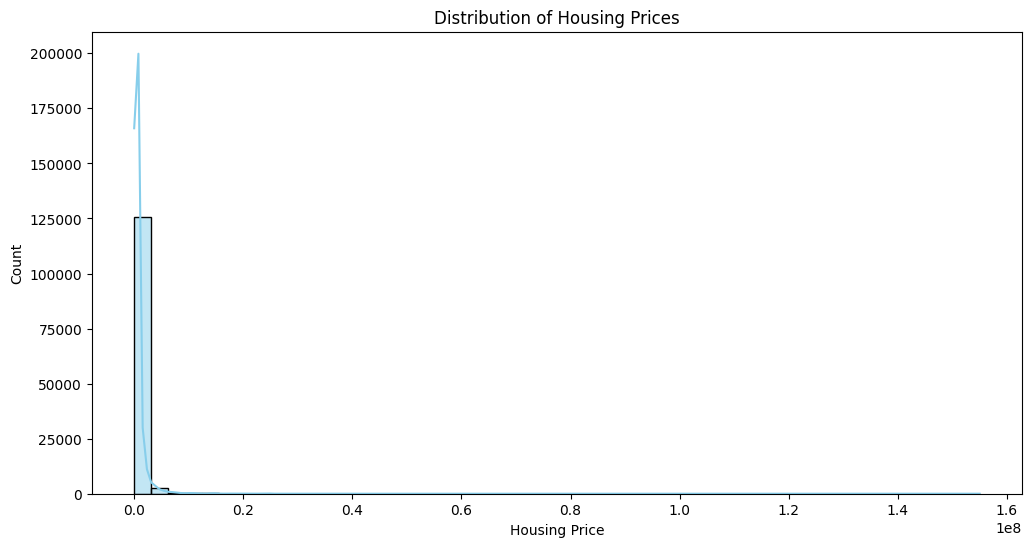

In [8]:
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Housing Prices")
plt.xlabel("Housing Price")
plt.ylabel("Count")
plt.show()

<Figure size 1200x600 with 0 Axes>

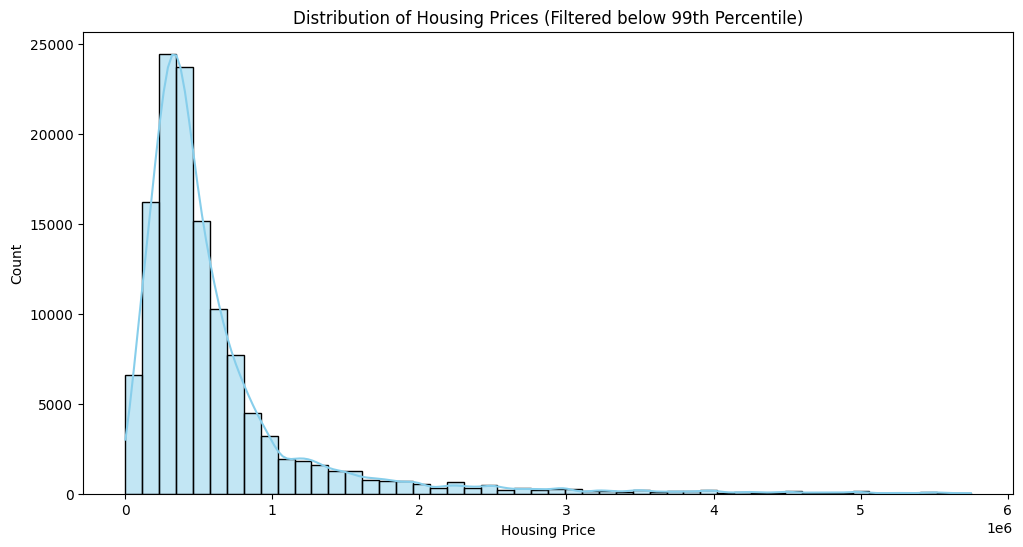

In [9]:
plt.figure(figsize=(12, 6))

price_threshold = df['price'].quantile(0.99)
filtered_df = df[df['price'] <= price_threshold]

plt.figure(figsize=(12, 6))
sns.histplot(filtered_df['price'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Housing Prices (Filtered below 99th Percentile)")
plt.xlabel("Housing Price")
plt.ylabel("Count")
plt.show()

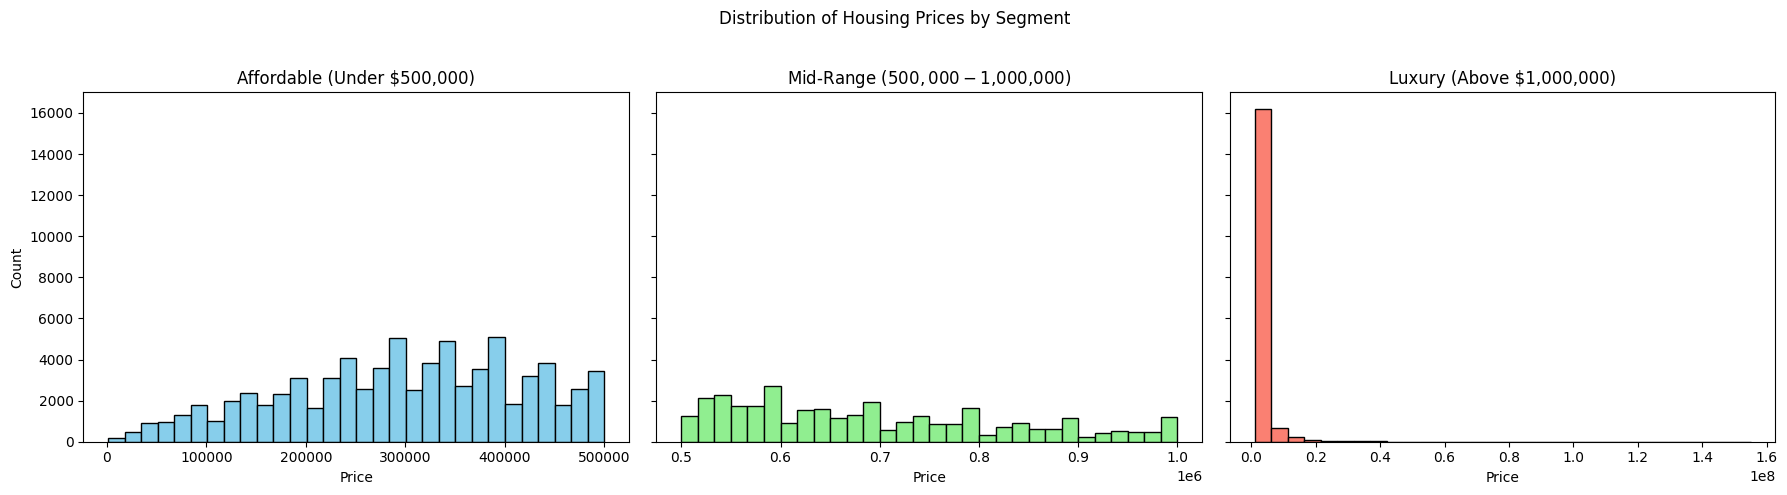

In [10]:
# Define price segments
affordable = df[df['price'] < 500000]
mid_range = df[(df['price'] >= 500000) & (df['price'] <= 1000000)]
luxury = df[df['price'] > 1000000]

# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Plot each price segment
# Affordable
axes[0].hist(affordable['price'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Affordable (Under $500,000)')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Count')

# Mid-range
axes[1].hist(mid_range['price'], bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Mid-Range ($500,000 - $1,000,000)')
axes[1].set_xlabel('Price')

# Luxury
axes[2].hist(luxury['price'], bins=30, color='salmon', edgecolor='black')
axes[2].set_title('Luxury (Above $1,000,000)')
axes[2].set_xlabel('Price')

# Show plot
plt.suptitle('Distribution of Housing Prices by Segment')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [11]:
df['homeType'].unique()

array(['SingleFamily', 'Townhouse', 'MultiFamily', 'MobileManufactured',
       'VacantLand', 'Condo', 'Cooperative', 'Apartment'], dtype=object)

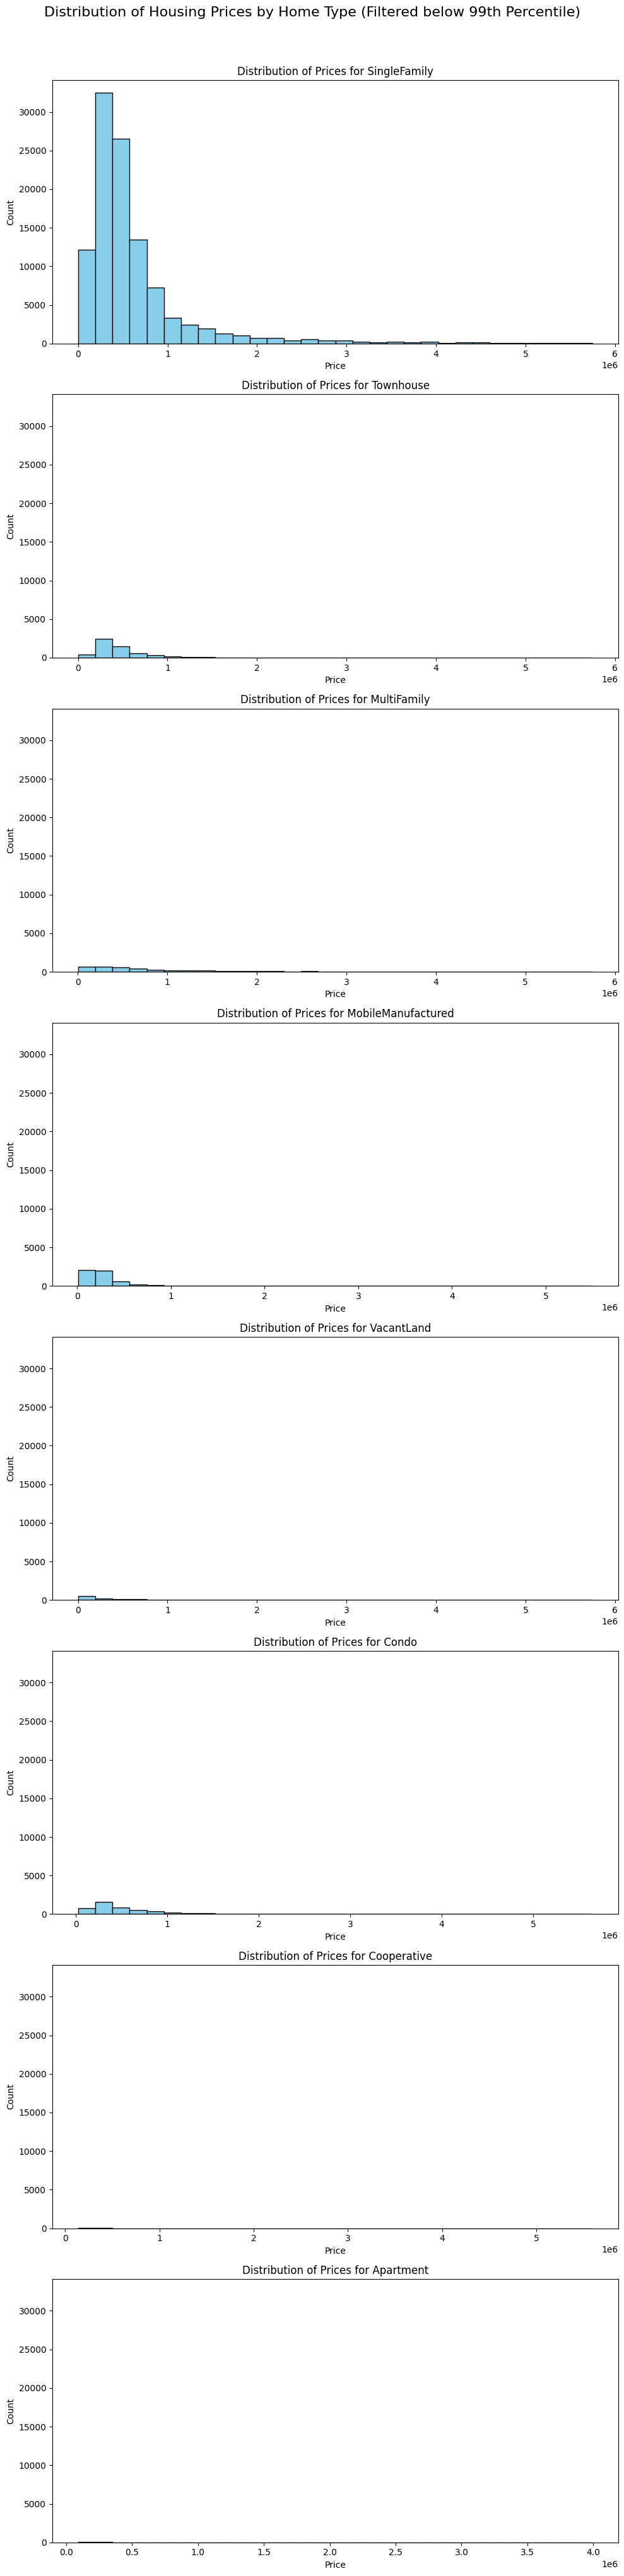

In [12]:
# Set up subplots for each home type
home_types = filtered_df['homeType'].unique()
fig, axes = plt.subplots(len(home_types), 1, figsize=(10, 5 * len(home_types)), sharey=True)

# Plot histogram for each home type
for ax, home_type in zip(axes, home_types):
    subset = filtered_df[filtered_df['homeType'] == home_type]
    ax.hist(subset['price'], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of Prices for {home_type}')
    ax.set_xlabel('Price')
    ax.set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.suptitle('Distribution of Housing Prices by Home Type (Filtered below 99th Percentile)', fontsize=16, y=1.02)
plt.show()

In [13]:
df[df['price'] >= df['price'].quantile(0.99)]['state'].value_counts()

,count
state,
CA,560
FL,217
WA,56
TX,54
NY,54
MT,40
AZ,38
UT,37
NV,27


In [14]:
selected_column = ['price', 'bedrooms', 'bathrooms', 'yearBuilt', 'livingArea', 'parkingCapacity', 'fireplaces', 'levels', 'lotSize'
  , 'hoaFee', 'buyersFeePerc', 'daysOnZillow', 'views', 'favorites', 'percSellFaster', 'propertyTax', 'mortgageRate'
  , 'agentRating', 'agentRecentSales', 'agentReviewsCount', 'rentZestimate', 'totalActualRent', 'annual_house_insurance'
  , 'schoolAverageDistance', 'schoolRatingElementary', 'schoolRatingMiddleSchool', 'schoolRatingHighSchool']

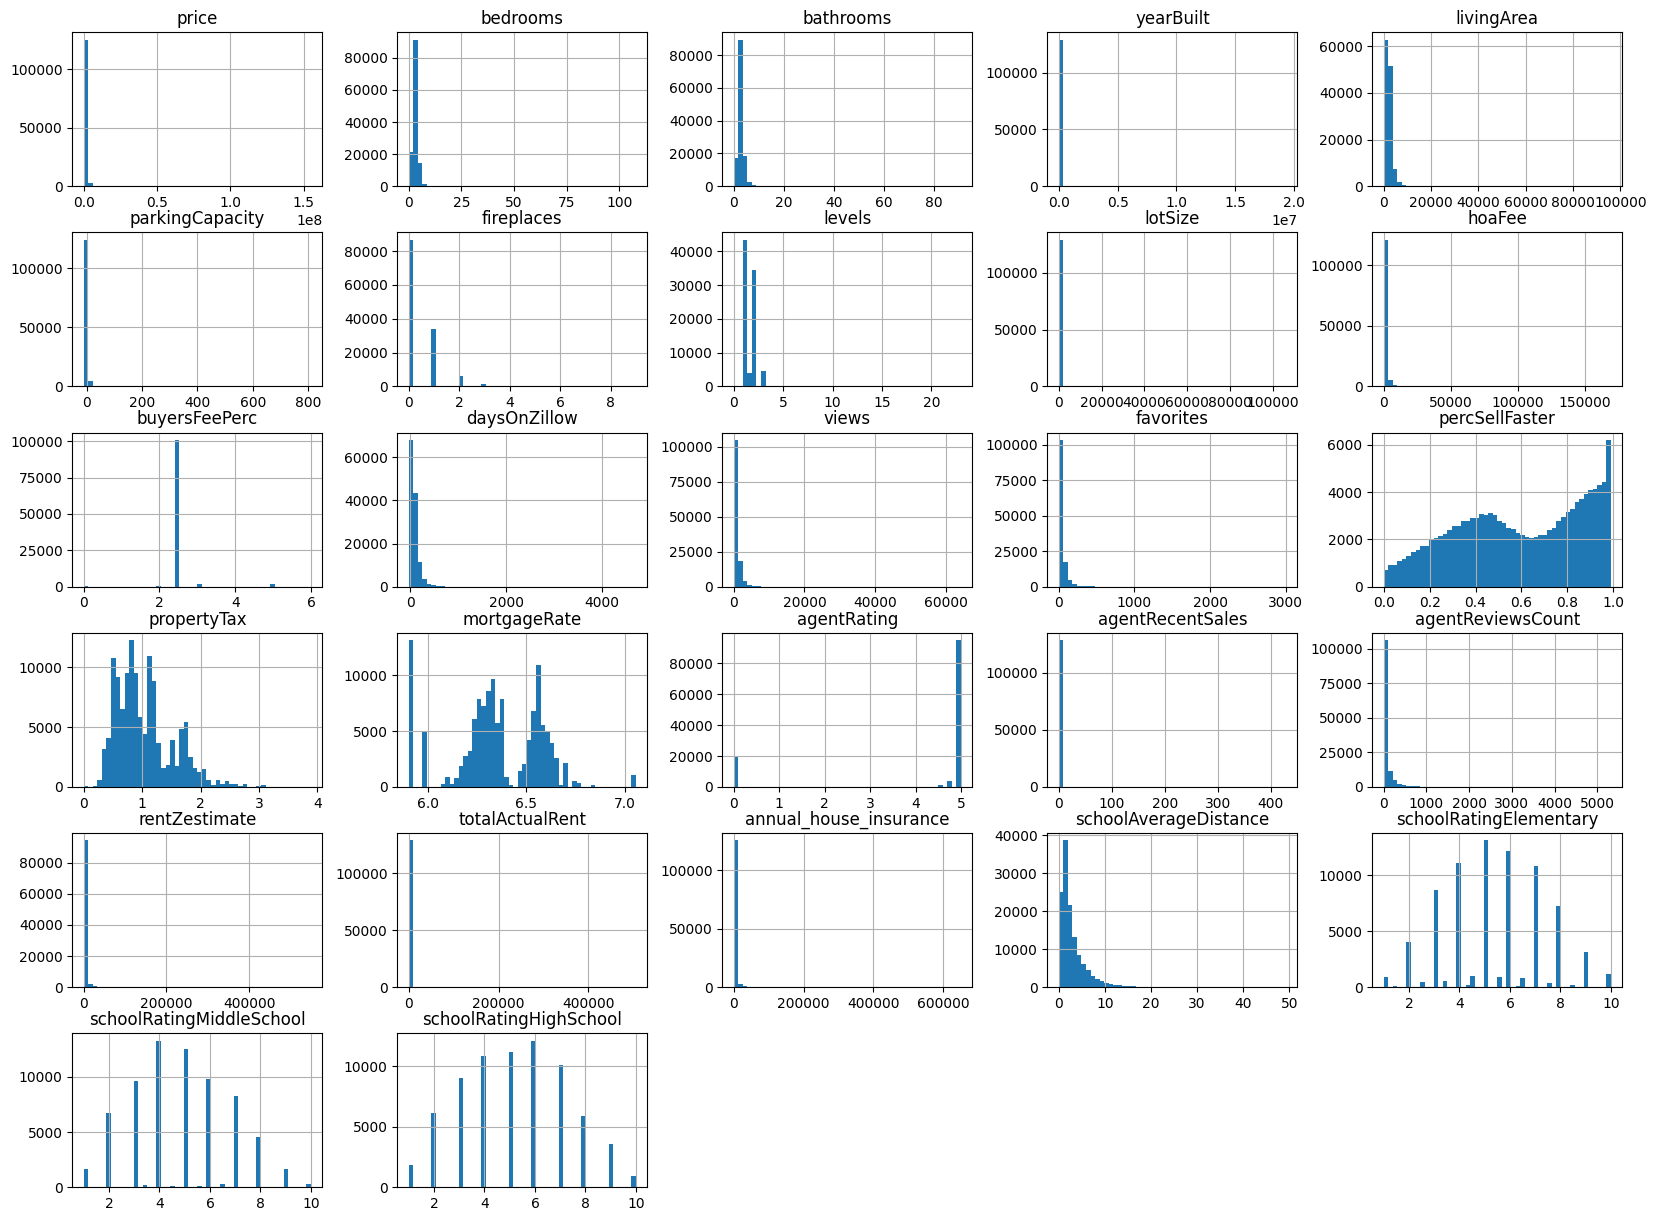

In [15]:
df[selected_column].hist(figsize=(20,15), bins=50)
plt.show()

In [16]:
df[df['yearBuilt']==0]

,Unnamed: 0,zillowId,homeStatus,streetAdress,city,state,zipcode,price,bedrooms,bathrooms,...,ngram_indooroutdoor,ngram_court,ngram_architectural,ngram_subzero,ngram_rarefied,ngram_antiquities,ngram_sauna,ngram_terrace,ngram_saota,ngram_italian
41,507,2.121027e+09,FOR_SALE,0 Redondo Beach Rd,Half Moon Bay,CA,94019.0,1288000.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
56,540,2.078874e+09,FOR_SALE,0 Sevilla Ave,El Granada,CA,94018.0,399900.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
69,568,2.104644e+09,FOR_SALE,0 Springwood,Pacifica,CA,94044.0,995000.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
83,591,2.120718e+09,FOR_SALE,0 Spring St,Pacifica,CA,94044.0,9500000.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
98,622,1.546850e+07,FOR_SALE,922 Wyandotte Ave,Daly City,CA,94014.0,1250000.0,4.0,3.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127658,262754,2.056211e+09,FOR_SALE,0 N 3rd St,Milburn,OK,73450.0,12000.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
127789,263092,2.094556e+09,FOR_SALE,Longfield Rd,Sterlington,LA,71280.0,600250.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
127814,263153,3.338743e+08,FOR_SALE,696 SE County Road 357,Mayo,FL,32066.0,7500000.0,3.0,2.0,...,0,0,0,0,0,0,0,0,0,0
128280,263944,2.054478e+09,FOR_SALE,Tl1100 Rainbow Rd,Christmas Valley,OR,97641.0,25000.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# for col in df.select_dtypes(include=['object', 'bool']).columns:
#     print(f'{col}: {df[col].nunique()} unique values')
#     print(df[col].value_counts())
#     print("\n")

In [18]:
df['state'].value_counts().head()

,count
state,
TX,15676
CA,14820
FL,13594
GA,6641
WA,5436


In [19]:
df['homeType'].value_counts()

,count
homeType,
SingleFamily,108181
Townhouse,5679
MobileManufactured,4986
Condo,4944
MultiFamily,3833
VacantLand,1199
Apartment,87
Cooperative,51


In [20]:
# Create a listing_date column from price history

import ast
import re

pattern = r'^\[\[\"[\d-]+\", (\d+|None)\](, \[\"[\d-]+\", (\d+|None)\])*\]$'

def clean_and_extract_date(price_history):
    if pd.notnull(price_history) and price_history != "[]":
        cleaned_history = price_history.replace("null", "None")
        try:
            history_list = ast.literal_eval(cleaned_history)
            if isinstance(history_list, list) and len(history_list) > 0:
                for entry in history_list:
                    if entry[0] is not None:
                        return entry[0]
        except (ValueError, SyntaxError):
            return None
    return None

df['listing_date'] = df['price_history'].apply(clean_and_extract_date)

In [21]:
df['listing_date'] = pd.to_datetime(df['listing_date'])

In [22]:
df['year_month'] = df['listing_date'].dt.to_period('M')
average_price = df.groupby(['state', 'year_month'])['price'].mean().reset_index()

In [23]:
# Drop 600 records that are from before 2020.
df = df[~(df['listing_date']<'2020-01-01')]

In [24]:
quartiles = df.groupby('year_month')['price'].quantile([0.25, 0.5, 0.75]).unstack()
quartiles.columns = ['1Q', 'Median', '3Q']

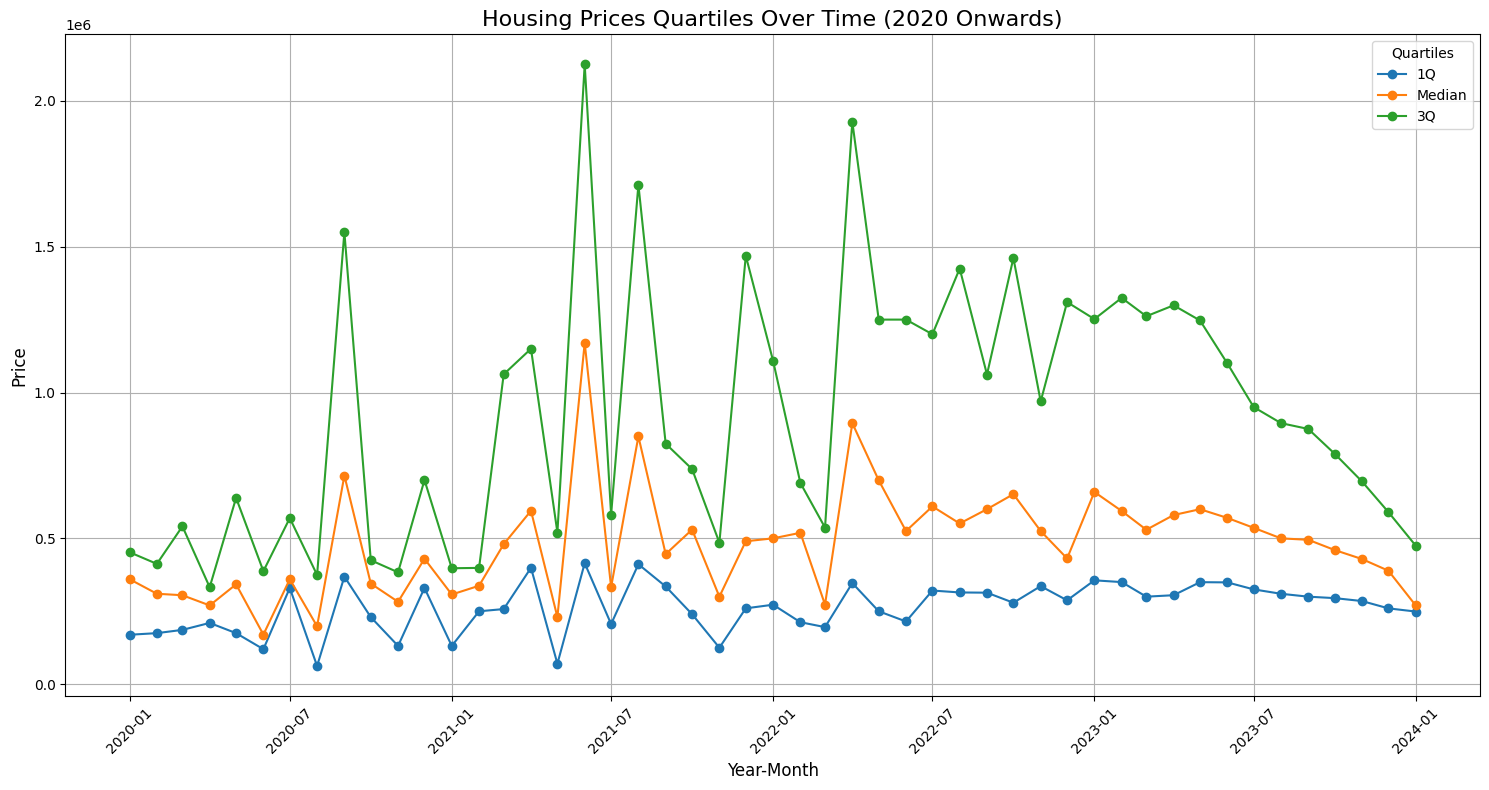

In [25]:
plt.figure(figsize=(15, 8))

quartiles_index_as_timestamp = quartiles.index.to_timestamp()

plt.plot(quartiles_index_as_timestamp, quartiles['1Q'], label='1Q', marker='o')
plt.plot(quartiles_index_as_timestamp, quartiles['Median'], label='Median', marker='o')
plt.plot(quartiles_index_as_timestamp, quartiles['3Q'], label='3Q', marker='o')

plt.title('Housing Prices Quartiles Over Time (2020 Onwards)', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Quartiles')
plt.grid()

plt.tight_layout()
plt.show()

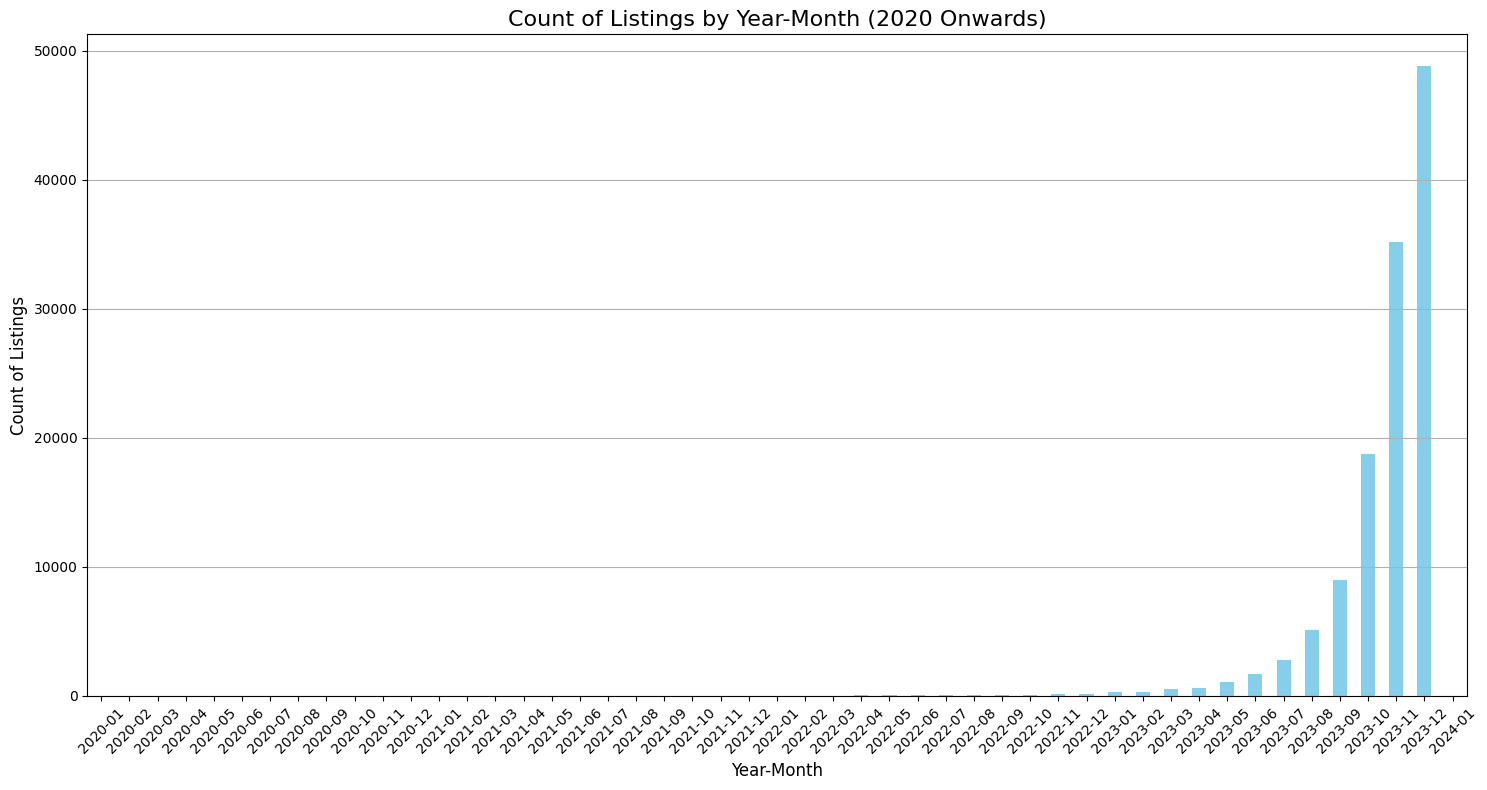

In [26]:
listing_counts = df['year_month'].value_counts().sort_index()
plt.figure(figsize=(15, 8))
listing_counts.plot(kind='bar', color='skyblue')

plt.title('Count of Listings by Year-Month (2020 Onwards)', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Count of Listings', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

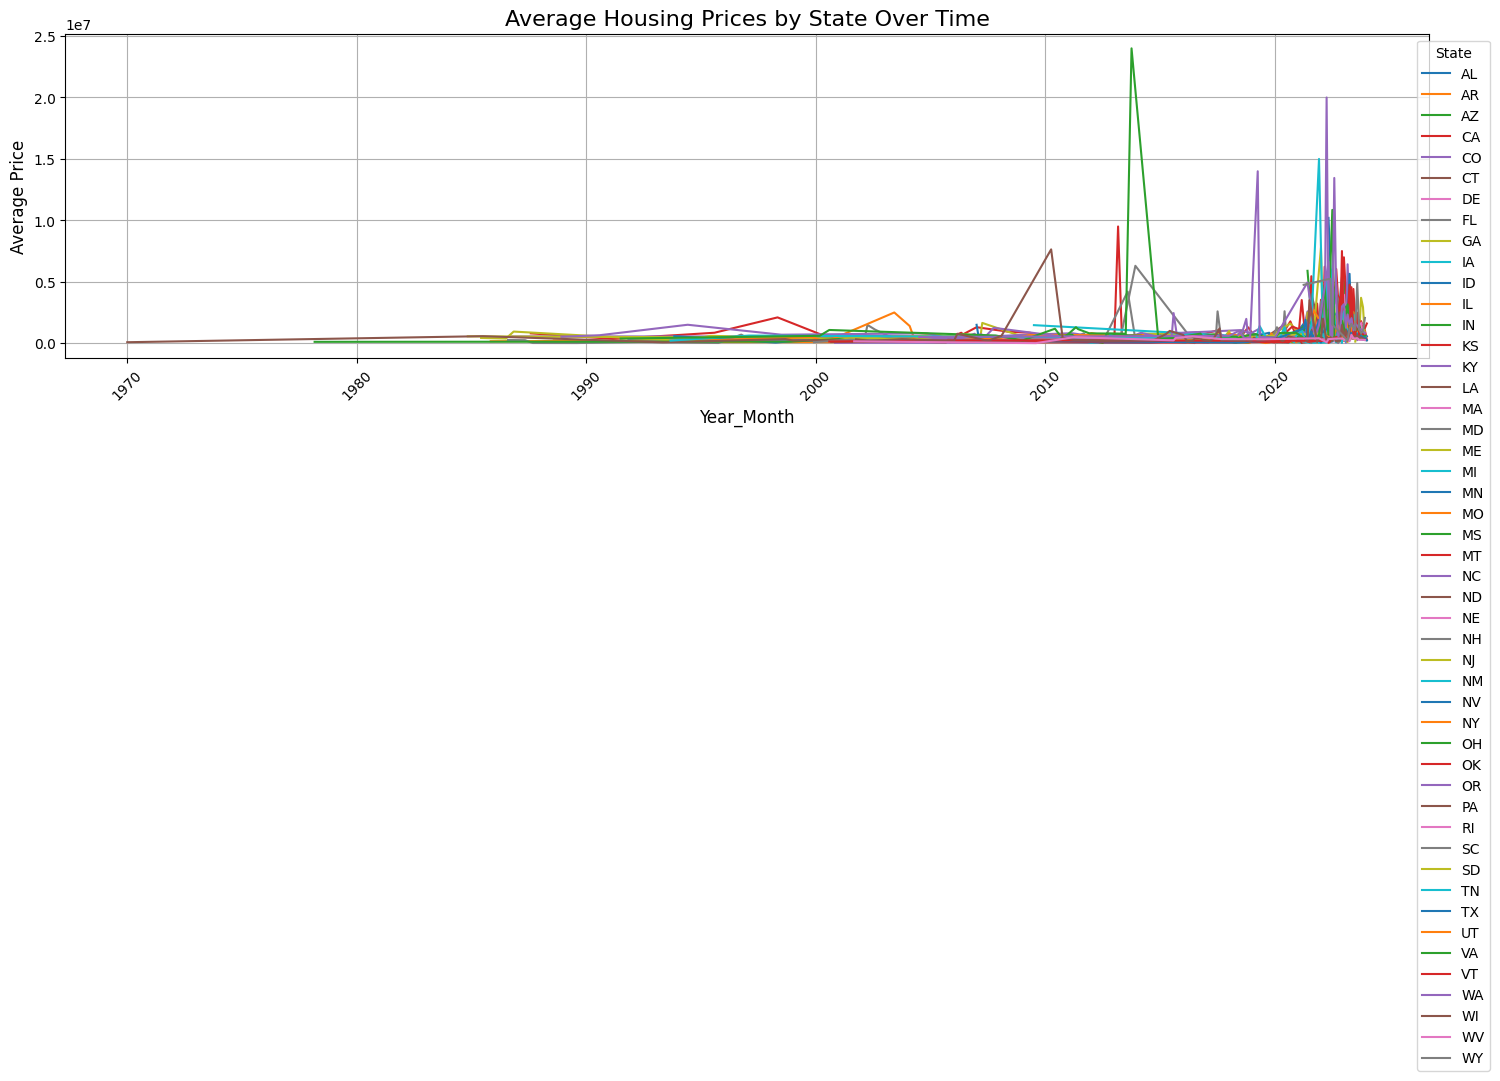

In [27]:
plt.figure(figsize=(15, 8))

for state in average_price['state'].unique():
    state_data = average_price[average_price['state'] == state]
    plt.plot(state_data['year_month'].dt.to_timestamp(), state_data['price'], label=state)

plt.title('Average Housing Prices by State Over Time', fontsize=16)
plt.xlabel('Year_Month', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper right')
plt.grid()

plt.tight_layout()
plt.show()

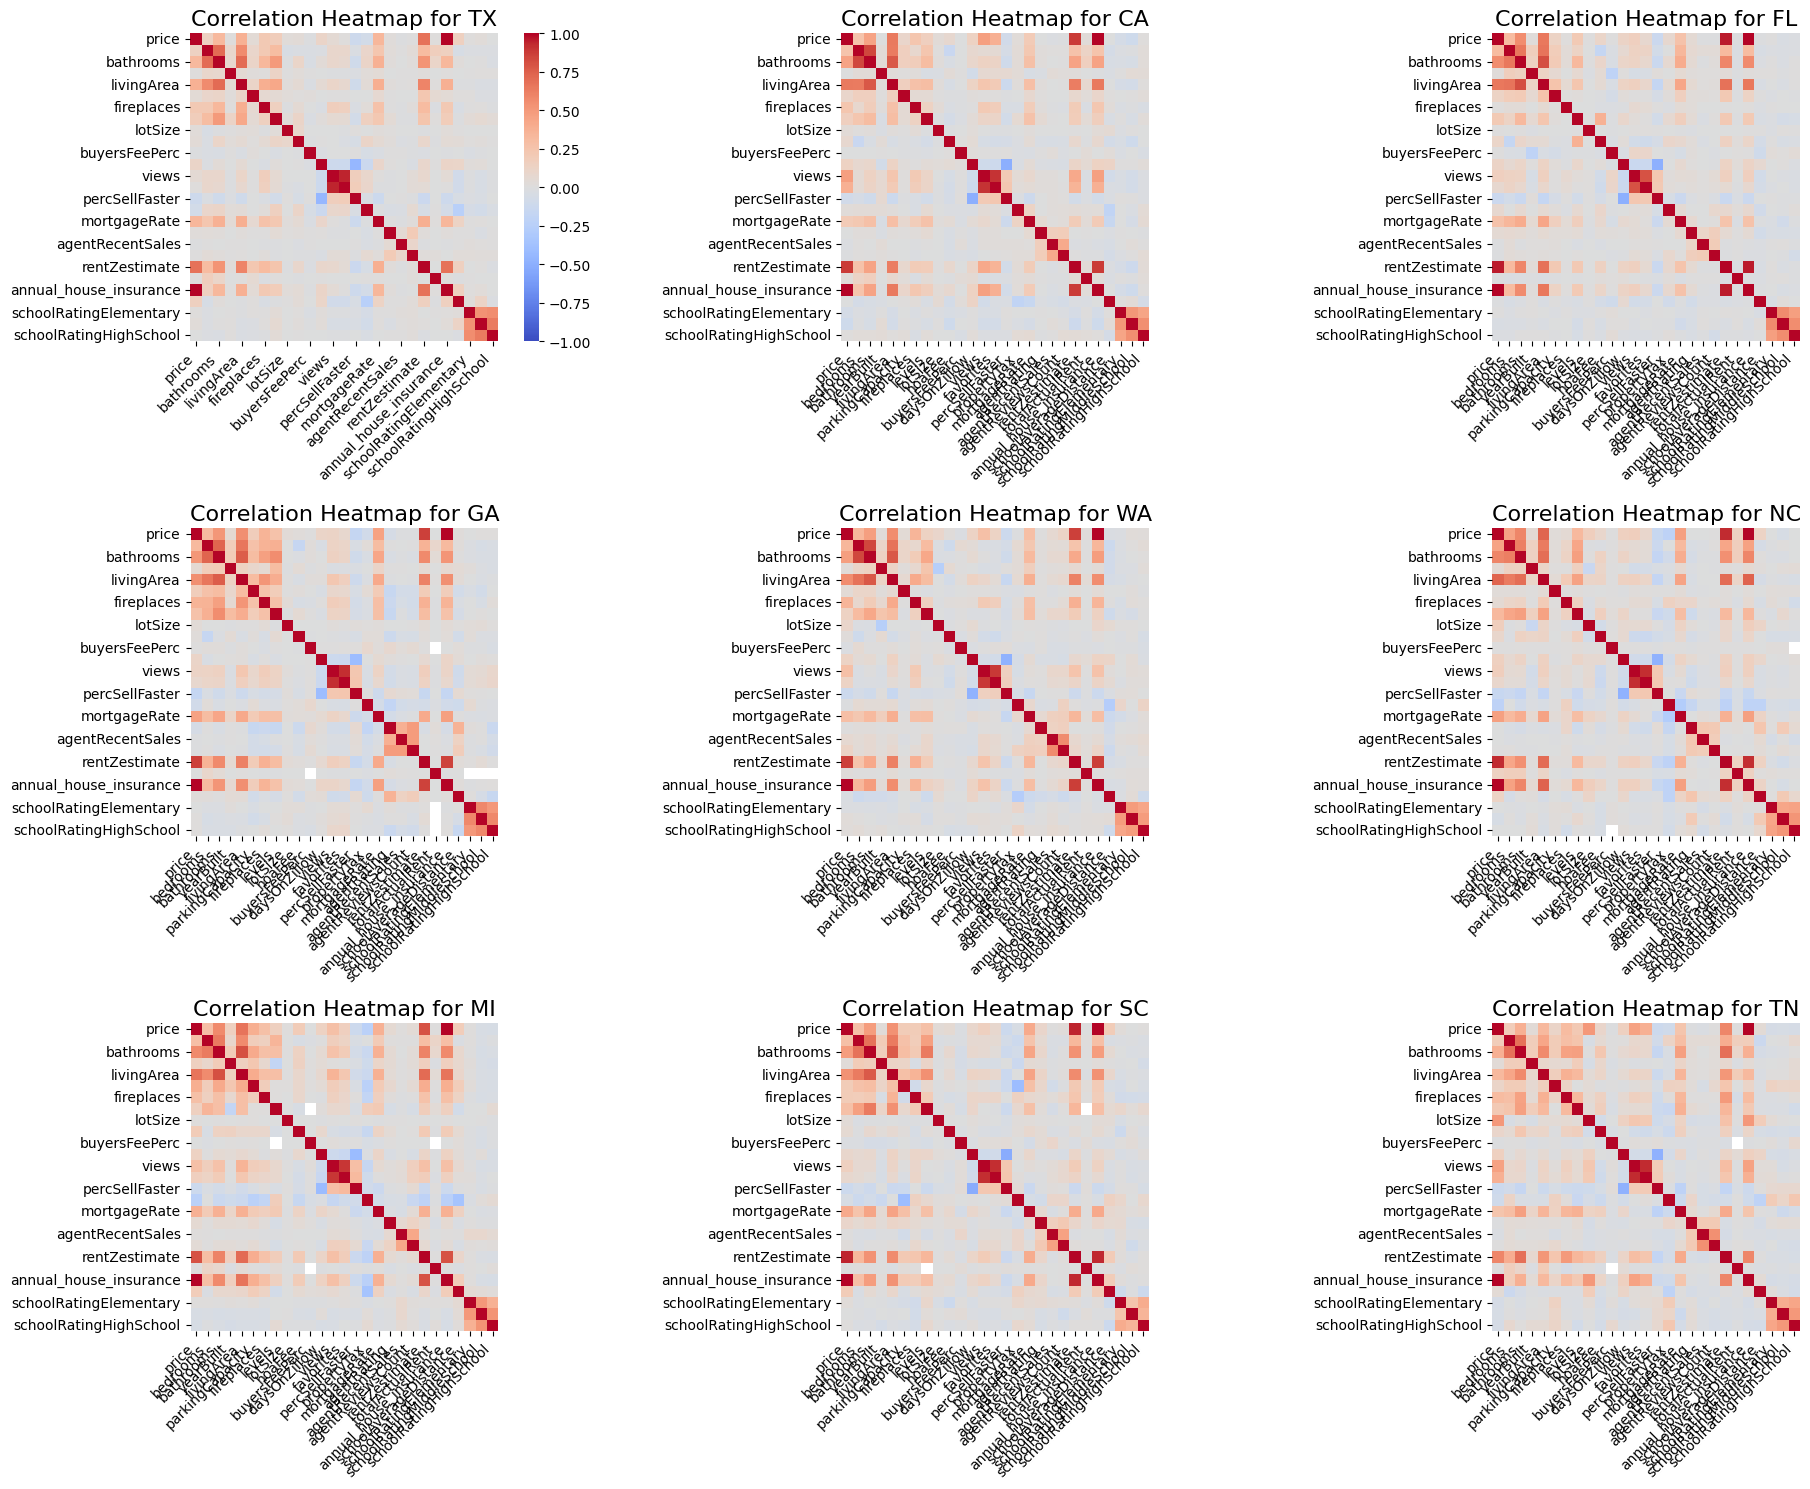

In [28]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()

selected_states = ['TX', 'CA', 'FL', 'GA', 'WA', 'NC', 'MI', 'SC', 'TN']

for i, state in enumerate(selected_states):
    filtered_df = df[df['state'] == state][selected_column]

    correlation_matrix = filtered_df.corr()

    sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap='coolwarm',
                ax=axes[i], square=True, cbar=i == 0,
                vmin=-1, vmax=1)

    axes[i].set_title(f'Correlation Heatmap for {state}', fontsize=16)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
    axes[i].set_yticklabels(axes[i].get_yticklabels(), rotation=0)

plt.tight_layout()

plt.show()

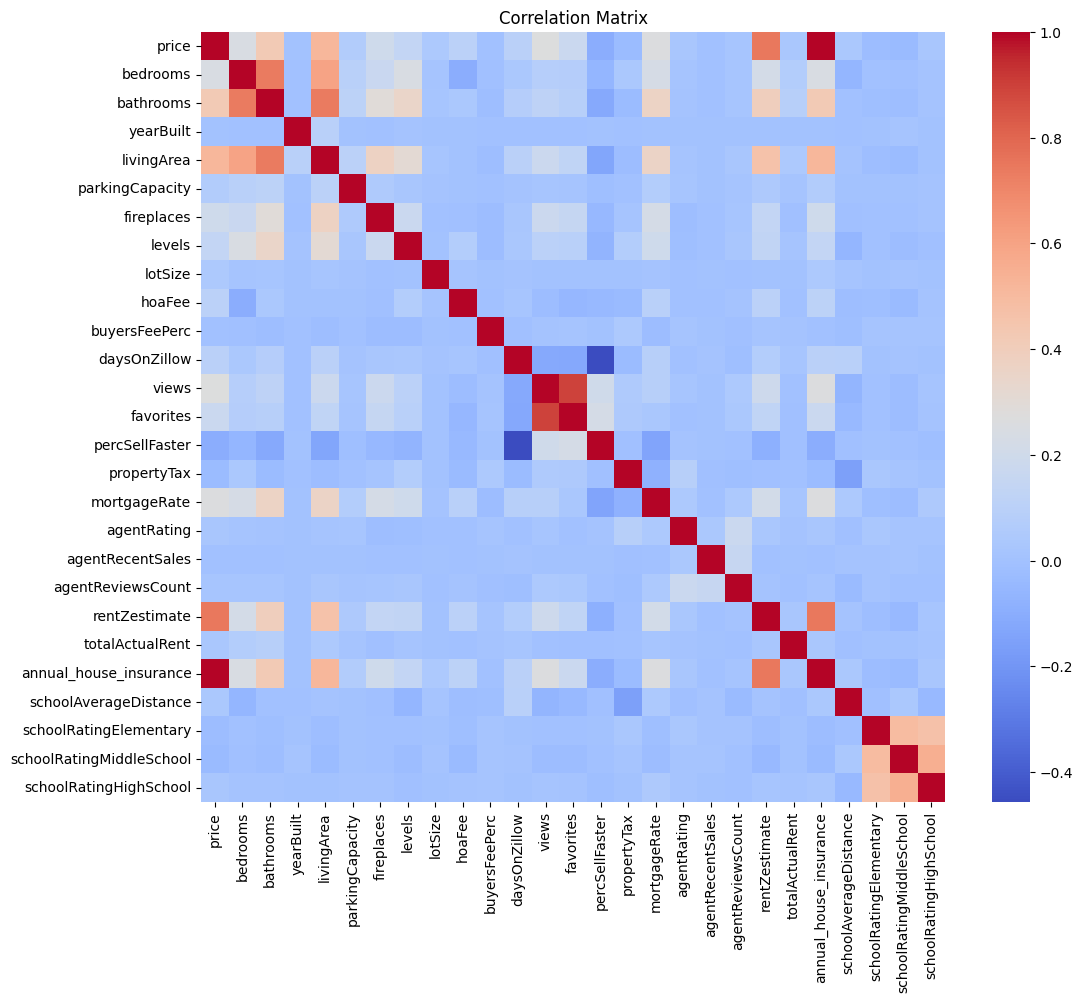

In [29]:
corr_matrix = df[selected_column].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [30]:
# Identify outliers using the IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create datasets for outliers and non-outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
non_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Calculate descriptive statistics for the specified columns
columns_to_compare = ['bedrooms', 'bathrooms', 'yearBuilt', 'livingArea',
                      'parkingCapacity', 'annual_house_insurance']

outlier_stats = outliers[columns_to_compare].describe()
non_outlier_stats = non_outliers[columns_to_compare].describe()

print("Outlier Statistics:\n", outlier_stats)
print("\nNon-Outlier Statistics:\n", non_outlier_stats)

Outlier Statistics:
            bedrooms     bathrooms     yearBuilt    livingArea  \
count  12287.000000  12287.000000  12287.000000  11848.000000   
mean       4.575568      4.621559   1954.742085   4317.683934   
std        3.304720      3.141968    263.332626   3143.356217   
min        0.000000      0.000000      0.000000      0.000000   
25%        3.000000      3.000000   1970.000000   2591.000000   
50%        4.000000      4.000000   2000.000000   3686.500000   
75%        5.000000      6.000000   2018.000000   5150.000000   
max      108.000000     91.000000   2025.000000  96000.000000   

       parkingCapacity  annual_house_insurance  
count     12287.000000            12287.000000  
mean          3.192398            14325.921117  
std           5.282039            20331.736932  
min         -11.000000             5577.600000  
25%           2.000000             6825.000000  
50%           2.000000             9219.000000  
75%           4.000000            14280.000000  
m

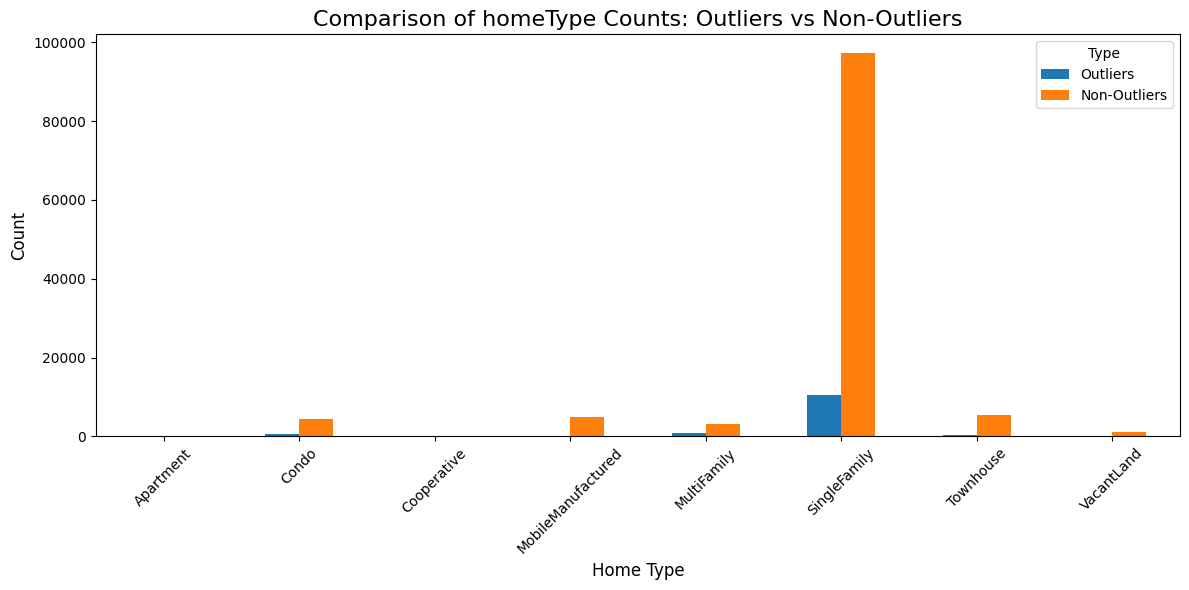

In [31]:
# Count homeType occurrences in outliers and non-outliers
outlier_counts = outliers['homeType'].value_counts().reset_index()
outlier_counts.columns = ['homeType', 'count_outliers']

non_outlier_counts = non_outliers['homeType'].value_counts().reset_index()
non_outlier_counts.columns = ['homeType', 'count_non_outliers']

# Merge the counts into a single DataFrame
comparison_df = pd.merge(outlier_counts, non_outlier_counts, on='homeType', how='outer').fillna(0)

# Plot the counts
comparison_df.set_index('homeType').plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of homeType Counts: Outliers vs Non-Outliers', fontsize=16)
plt.xlabel('Home Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Type', labels=['Outliers', 'Non-Outliers'])
plt.tight_layout()
plt.show()

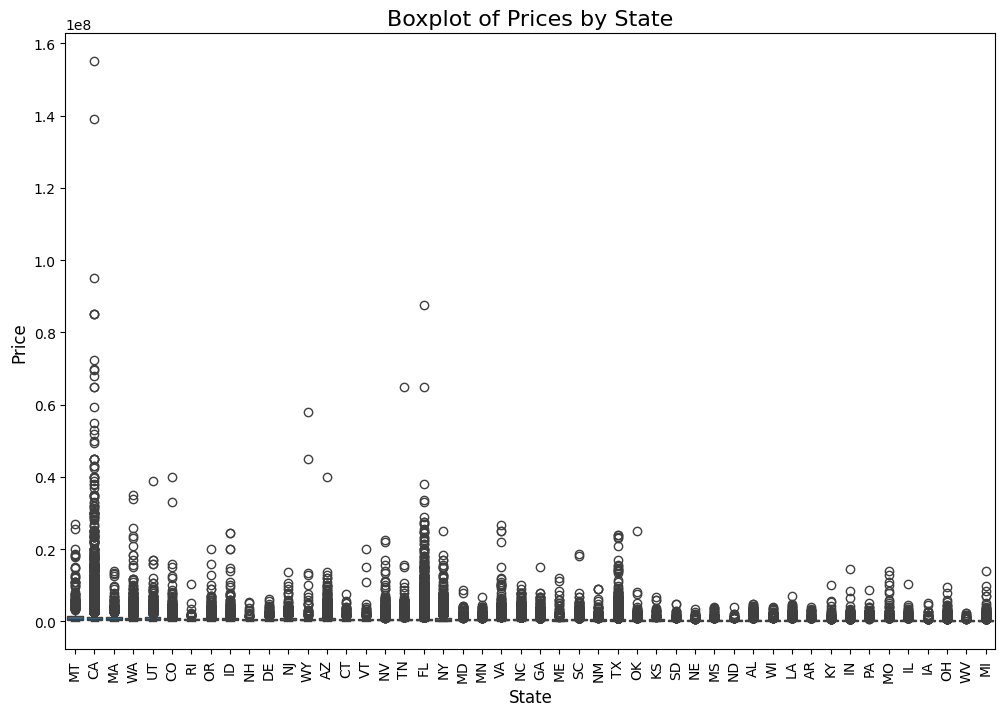

In [32]:
plt.figure(figsize=(12, 8))

sns.boxplot(x='state', y='price', data=df, order=df.groupby('state')['price'].median().sort_values(ascending=False).index)

plt.xticks(rotation=90)

plt.title('Boxplot of Prices by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Price', fontsize=12)

plt.show()

In [33]:
pivot_table = df.groupby('state')['price'].agg(
    Q1=lambda x: x.quantile(0.25),
    Median='median',
    Q3=lambda x: x.quantile(0.75)
).reset_index()

pivot_table

,state,Q1,Median,Q3
0,AL,200000.00,319900.0,479095.00
1,AR,179000.00,290000.0,439000.00
2,AZ,345000.00,489990.0,850000.00
3,CA,485000.00,729035.0,1329990.00
4,CO,449000.00,595000.0,847970.00
5,CT,329900.00,479900.0,799000.00
6,DE,355000.00,499000.0,779000.00
7,FL,329000.00,449000.0,700000.00
8,GA,299000.00,399000.0,562108.00
9,IA,170900.00,259000.0,379990.00


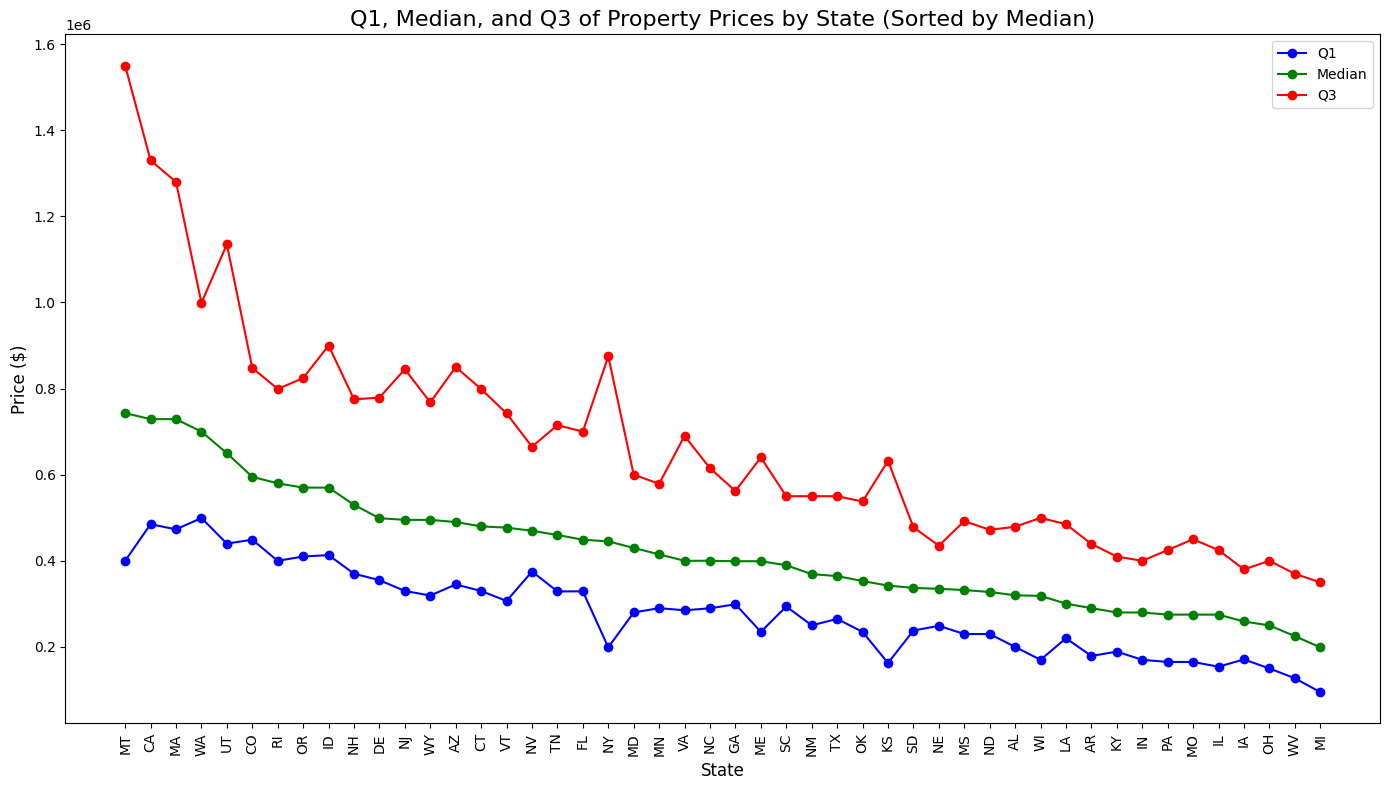

In [34]:
pivot_table_sorted = pivot_table.sort_values(by='Median', ascending=False)

plt.figure(figsize=(14, 8))

# Plot lines for Q1, Median, and Q3, sorted by median
plt.plot(pivot_table_sorted['state'], pivot_table_sorted['Q1'], label='Q1', marker='o', linestyle='-', color='blue')
plt.plot(pivot_table_sorted['state'], pivot_table_sorted['Median'], label='Median', marker='o', linestyle='-', color='green')
plt.plot(pivot_table_sorted['state'], pivot_table_sorted['Q3'], label='Q3', marker='o', linestyle='-', color='red')

# Customize the plot
plt.title('Q1, Median, and Q3 of Property Prices by State (Sorted by Median)', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.xticks(rotation=90)  # Rotate state names for better visibility
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

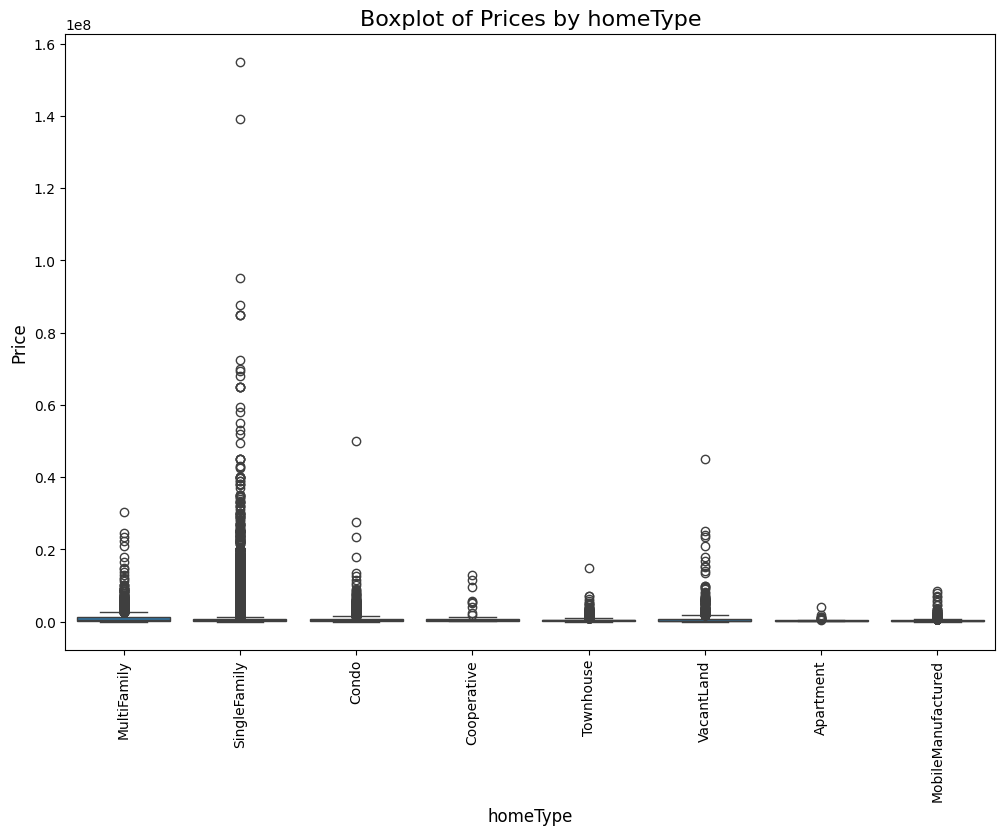

In [35]:
plt.figure(figsize=(12, 8))

sns.boxplot(x='homeType', y='price', data=df, order=df.groupby('homeType')['price'].median().sort_values(ascending=False).index)

plt.xticks(rotation=90)

plt.title('Boxplot of Prices by homeType', fontsize=16)
plt.xlabel('homeType', fontsize=12)
plt.ylabel('Price', fontsize=12)

plt.show()

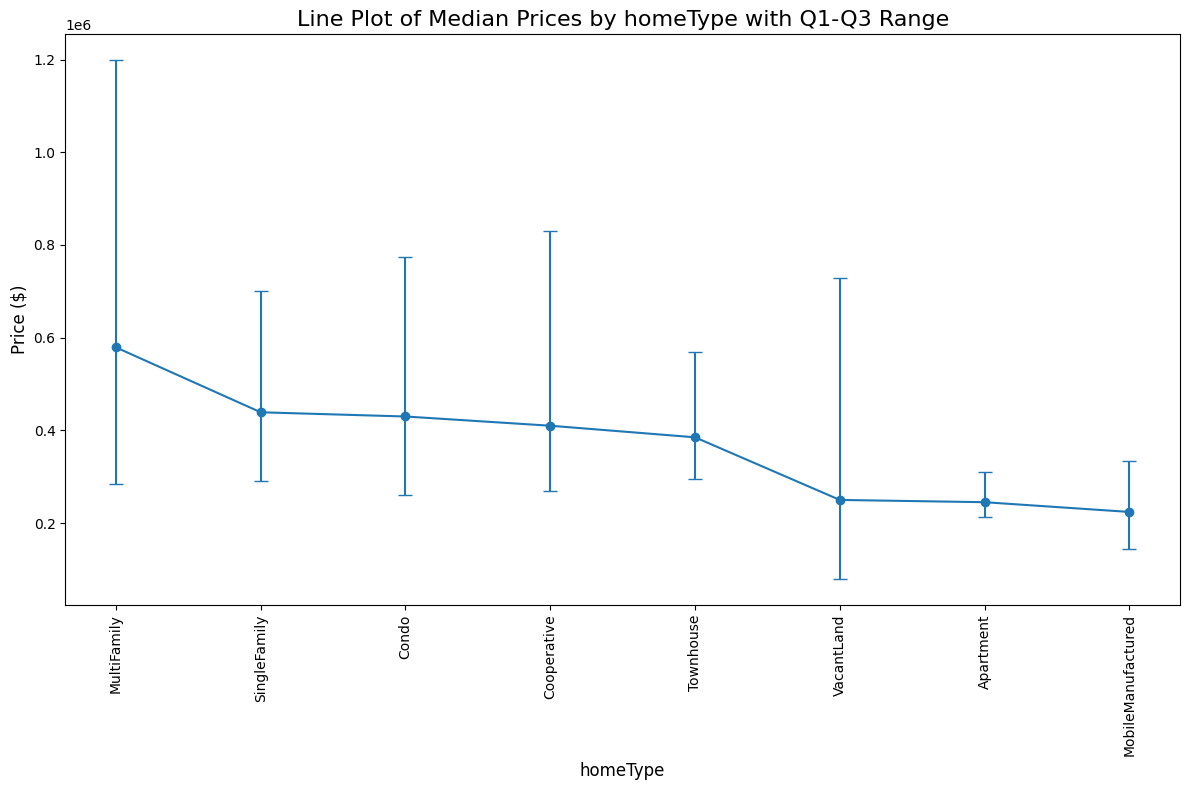

In [36]:
# Calculate Q1, median, and Q3 for each homeType
home_type_stats = df.groupby('homeType')['price'].agg(Q1=lambda x: x.quantile(0.25),
                                                      Median='median',
                                                      Q3=lambda x: x.quantile(0.75)).sort_values(by='Median', ascending=False)

# Create a line plot with error bars for Q1 and Q3
plt.figure(figsize=(12, 8))

# Plot the median prices with error bars showing the range between Q1 and Q3
plt.errorbar(x=home_type_stats.index, y=home_type_stats['Median'],
             yerr=[home_type_stats['Median'] - home_type_stats['Q1'], home_type_stats['Q3'] - home_type_stats['Median']],
             fmt='o-', capsize=5, label='Median with Q1-Q3 Range')

# Customize the plot
plt.xticks(rotation=90)
plt.title('Line Plot of Median Prices by homeType with Q1-Q3 Range', fontsize=16)
plt.xlabel('homeType', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Create a listing_date column from price history

import ast
import re

pattern = r'^\[\[\"[\d-]+\", (\d+|None)\](, \[\"[\d-]+\", (\d+|None)\])*\]$'

def clean_and_extract_date(price_history):
    if pd.notnull(price_history) and price_history != "[]":
        cleaned_history = price_history.replace("null", "None")
        try:
            history_list = ast.literal_eval(cleaned_history)
            if isinstance(history_list, list) and len(history_list) > 0:
                for entry in history_list:
                    if entry[0] is not None:
                        return entry[0]
        except (ValueError, SyntaxError):
            return None
    return None

df['listing_date'] = df['price_history'].apply(clean_and_extract_date)

In [ ]:
df[(~df['price_history'].isnull())&(df['listing_date'].isnull())]['price_history']

,price_history
203,[]
489,[]
571,[]
587,[]
972,[]
...,...
128087,[]
128393,"[[null, 424900]]"
128395,"[[null, 139900]]"
128471,[]


In [ ]:
df['listing_date'].isnull().sum()

2685

In [ ]:
# Create a listing_date column from price history

df['listing_date'] = df['price_history'].apply(lambda x: x[3:13] if pd.notnull(x) and len(x) > 13 else None)

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Set a threshold, e.g., remove features with less than 5% variance
selector = VarianceThreshold(threshold=0.05)
reduced_df = selector.fit_transform(df.select_dtypes(include=['int64', 'float64']))

# Get the remaining features
selected_columns = df.select_dtypes(include=['int64', 'float64']).columns[selector.get_support()]
print(selected_columns)

Index(['Unnamed: 0', 'zillowId', 'zipcode', 'price', 'bedrooms', 'bathrooms',
       'yearBuilt', 'zestimate', 'livingArea', 'parkingCapacity', 'fireplaces',
       'levels', 'lotSize', 'hoaFee', 'buyersFeePerc', 'daysOnZillow', 'views',
       'favorites', 'latitude', 'longitude', 'percSellFaster', 'propertyTax',
       'mortgageRate', 'agentRating', 'agentRecentSales', 'agentReviewsCount',
       'rentZestimate', 'totalActualRent', 'annual_house_insurance',
       'schoolAverageDistance', 'schoolRatingElementary',
       'schoolRatingMiddleSchool', 'schoolRatingHighSchool', 'ngram_estate',
       'ngram_private', 'ngram_expansive', 'ngram_designed', 'ngram_luxury',
       'ngram_custom', 'ngram_stunning', 'ngram_court'],
      dtype='object')


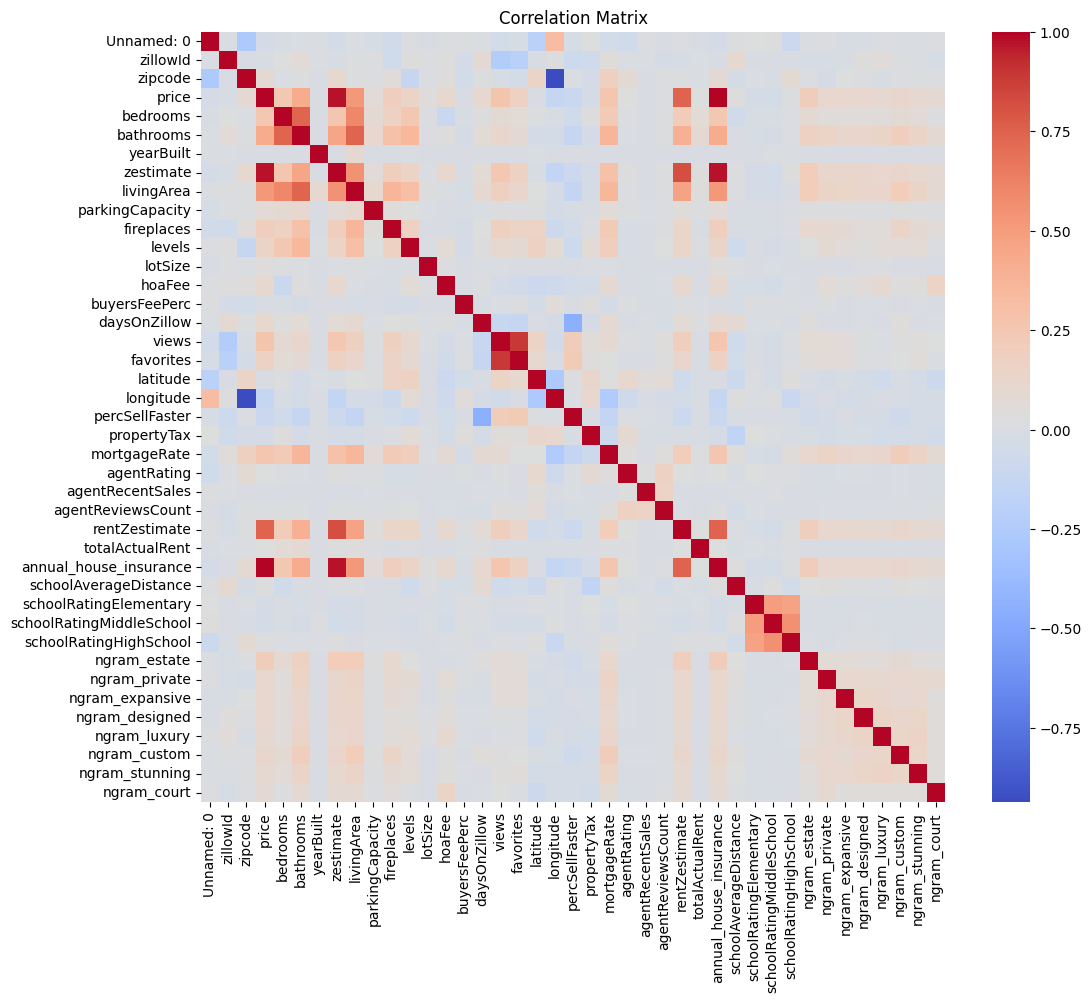

In [ ]:
selected_df = df[selected_columns]
corr_matrix = selected_df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
state_agg = df.groupby('state').size().reset_index(name='count')

In [ ]:
import geopandas as gpd
us_states = gpd.read_file('./ne_110m_admin_1_states_provinces.shp')
us_states = us_states[us_states['iso_a2'] == 'US']

In [ ]:
us_states['state_abbrev'] = us_states['name_alt'].str[:2]
us_states.loc[us_states['name'] == 'Kentucky', 'state_abbrev'] = 'KY'
us_states.loc[us_states['name'] == 'Pennsylvania', 'state_abbrev'] = 'PA'
us_states.loc[us_states['name'] == 'Massachusetts', 'state_abbrev'] = 'MA'
us_states.loc[us_states['name'] == 'Rhode Island', 'state_abbrev'] = 'RI'

In [ ]:
merged_df = us_states.merge(state_agg, left_on='state_abbrev', right_on='state', how='left')
merged_df = merged_df[~merged_df['count'].isnull()]

We are missing records from HI, AK, and DC

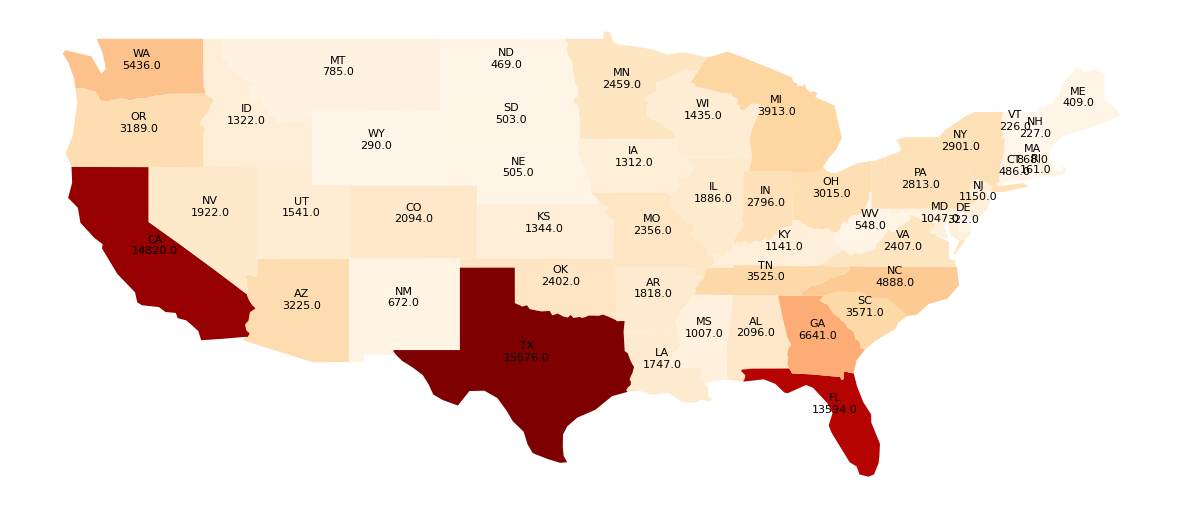

In [ ]:
# Create the plot for 'count' with GeoPandas
fig, ax = plt.subplots(1, 1, figsize=(15, 12))
merged_df.plot(column='count', ax=ax, cmap='OrRd')

# Add state_abbrev and count labels
for idx, row in merged_df.iterrows():
    # Positioning the text near the center of the state geometry
    plt.text(row.geometry.centroid.x, row.geometry.centroid.y,
             f"{row['state_abbrev']}\n{row['count']}",
             ha='center', fontsize=8, color='black')

# Customize the plot
# plt.title('States with Abbreviation and Count', fontsize=16)
plt.axis('off')  # Hide the axes

# Show the plot
plt.show()

In [ ]:
# merged_df.plot(column = 'count', figsize = (10, 8))

In [ ]:
# Calculate correlation between all numerical columns and 'price'
correlation_with_price = selected_df.corr()['price'].sort_values(ascending=False)

# Set up the figure size
plt.figure(figsize=(10, 8))

# Create a horizontal bar plot
sns.barplot(x=correlation_with_price.values, y=correlation_with_price.index, palette='coolwarm')

# Add title and labels
plt.title('Correlation of Numerical Features with Price', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

NameError: name 'selected_df' is not defined